## Problem 1:  Exploring the Penalty Term Hyperparameter
This problem explores how the penalty parameter C affects the performance of a linear SVM using the Wine dataset. We relabel the classes into a binary problem, train SVMs with different C values and analyze how changes in C influence the decision boundary, margins & support vectors.

In [5]:

"""
    1. load in the wine dataset from scikit-learn
    2. relabel the response variable so that class 2 becomes class 1 and classes 0 and 1 become class 0
    3. 
"""

# import libraries
from sklearn.datasets import load_wine
import numpy as np

# loading the wine dataset
wine = load_wine()
print("Features: ", wine.feature_names)
print("Target Classes: ", set(wine.target))

y = wine.target

# np.where(condition, value_if_true, value_if_false)
# class 2 becomes class 1 | class 0 and 1 become class 0
y_binary = np.where(y == 2, 1, 0)   



Features:  ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Target Classes:  {np.int64(0), np.int64(1), np.int64(2)}


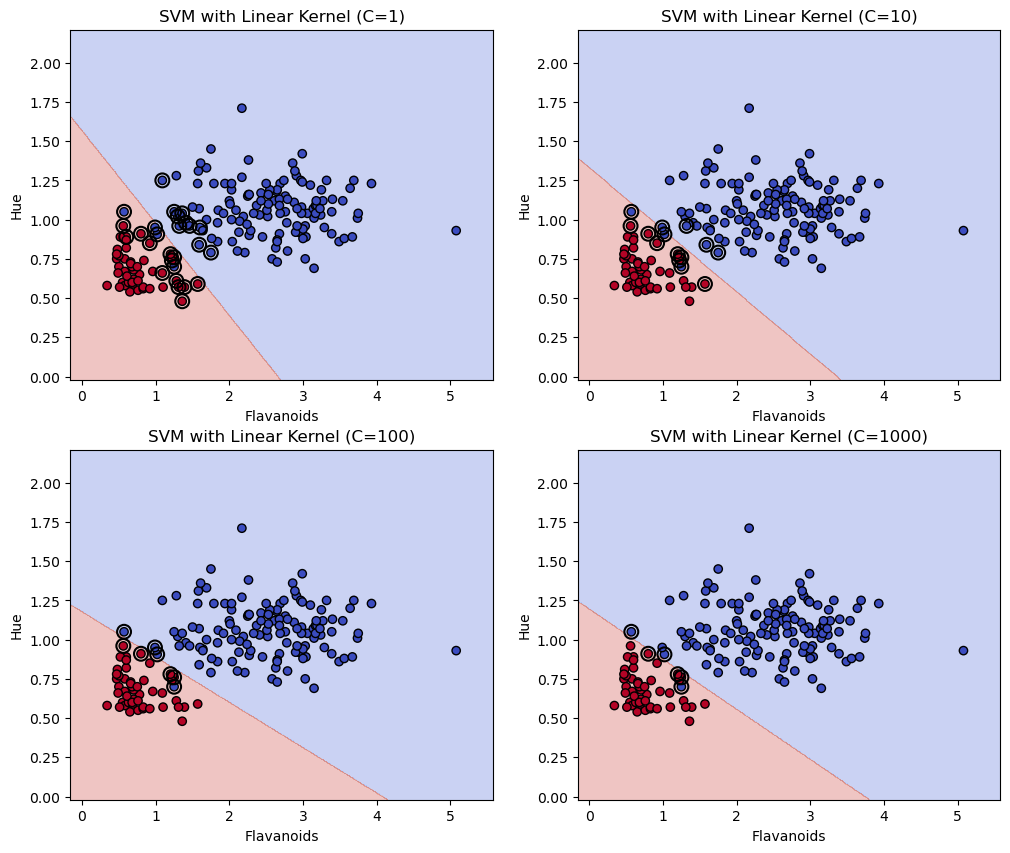

In [17]:

"""

    3. Train SVM models with a linear kernel and C values of [1,10,100,1000] on the hue and flavanoids features using the SVC class. 
    (Features 10 and 6, respectively.)

    4. 


"""

# import libraries
import matplotlib.pyplot as plt
from sklearn.svm import SVC

c_vals = [1, 10, 100, 1000]
X = wine.data[:, [6, 10]]

plt.figure(figsize=(12, 10))

# looping through the c values
for i, c_vals in enumerate(c_vals):

    model = SVC(kernel='linear', C=c_vals)
    model.fit(X, y_binary)

    plt.subplot(2, 2, i+1)

    # decision boundary
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # decision regions
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

    # data points
    plt.scatter(X[:, 0], X[:, 1], c=y_binary, cmap=plt.cm.coolwarm, edgecolors='k')

    # support vectors
    plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k', linewidths=1.5)

    plt.title(f"SVM with Linear Kernel (C={c_vals})")
    plt.xlabel("Flavanoids")
    plt.ylabel("Hue")


plt.show() 



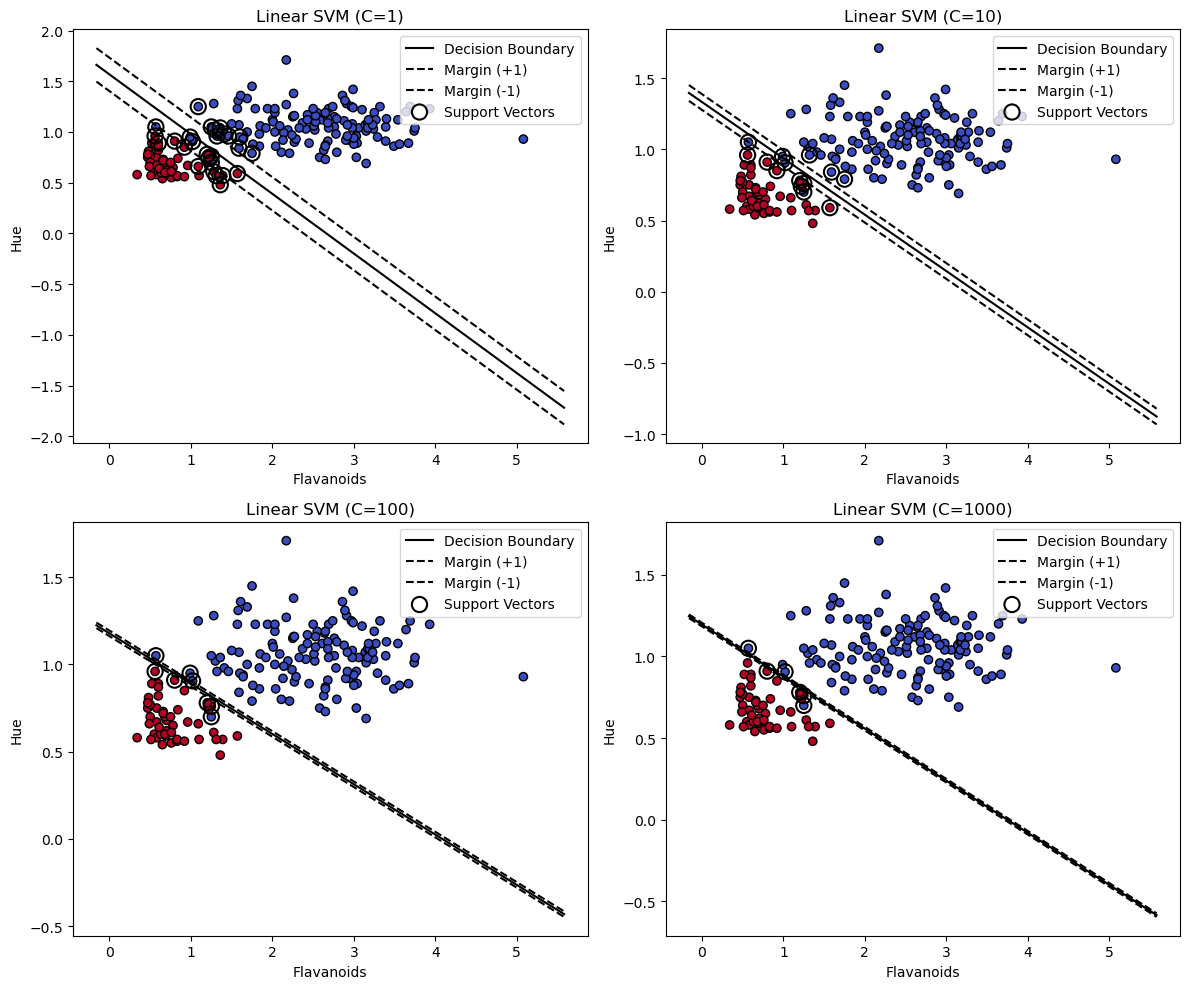

In [ ]:


c_values = [1, 10, 100, 1000]
plt.figure(figsize=(12, 10))

for i, C in enumerate(c_values):

    model = SVC(kernel='linear', C=C)
    model.fit(X, y_binary)

    w = model.coef_[0]
    b = model.intercept_[0]

    # grid for plotting
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx = np.linspace(x_min, x_max, 200)
    
    # the decision boundary
    yy = -(w[0] * xx + b) / w[1]

    # adding in margins
    margin = 1 / np.linalg.norm(w)
    yy_plus = yy + (w[0] / w[1]) * margin
    yy_minus = yy - (w[0] / w[1]) * margin

    # creating sub plots
    plt.subplot(2, 2, i + 1)

    # plotting data points
    plt.scatter(X[:, 0], X[:, 1], c=y_binary, cmap=plt.cm.coolwarm, edgecolors='k')


    # decision boundaries with margin
    plt.plot(xx, yy, 'k-', label='Decision Boundary')
    plt.plot(xx, yy_plus, 'k--', label='Margin (+1)')
    plt.plot(xx, yy_minus, 'k--', label='Margin (-1)')

    # plotting the support vectors
    plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], 
                s=120, facecolors='none', edgecolors='k', linewidths=1.5, label='Support Vectors')


    # adding in plot details
    plt.title(f"Linear SVM (C={C})")
    plt.xlabel("Flavanoids")
    plt.ylabel("Hue")
    plt.legend(loc='upper right')


# displaying the plot
plt.show()

## Problem 2: The Problem with Kernels
In this problem, we explore how data that is not linearly serparable in lower dimensions can become linearly separable when transformed into higher dimensional spaces using non-linear mappings. This demonstrates the core idea behind the kernel trick in SVMs which allows for complex boundaries to be found efficiently without explictly computing higher-dimensional transformations.